## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

In [1]:
import pandas as pd
df=pd.read_csv('datasets/worldwide_browser_trends.csv') #load df

In [2]:
#now we get the shape and cols
print(df.shape)
print(df.columns)

(202, 6)
Index(['Month', 'Firefox', 'Safari', 'Google Chrome', 'Internet Explorer',
       'Opera'],
      dtype='object')



Six-Month Rolling Average:
     Firefox  Safari  Google Chrome  Internet Explorer     Opera
0        NaN     NaN            NaN                NaN       NaN
1        NaN     NaN            NaN                NaN       NaN
2        NaN     NaN            NaN                NaN       NaN
3        NaN     NaN            NaN                NaN       NaN
4        NaN     NaN            NaN                NaN       NaN
5  19.833333     2.0       1.833333          35.500000  9.000000
6  24.666667     2.0       1.833333          35.166667  9.333333
7  26.833333     2.0       1.833333          34.166667  9.333333
8  31.166667     2.0       1.833333          33.833333  9.500000
9  35.333333     2.0       1.666667          33.666667  9.500000


<AxesSubplot:title={'center':'6 Month Rolling Average'}>

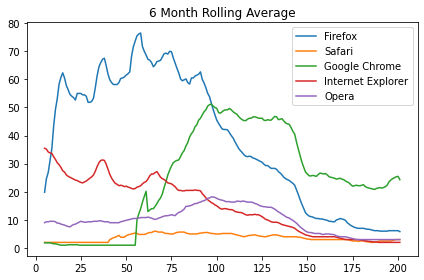

In [3]:
rolling_six = df.rolling(window=6).mean() #get the six month rolling average

print("\nSix-Month Rolling Average:")
print(rolling_six.head(10)) #grab the head to display
rolling_six.plot(title="6 Month Rolling Average") #plot via matplotlib to illustrate the differences

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2009-03-31,-1.477833,28.571429,-5.000000,13.043478,-5.882353
2009-06-30,-6.500000,-5.555556,21.052632,2.564103,-6.250000
2009-09-30,13.368984,0.000000,21.739130,-3.750000,13.333333
2009-12-31,-4.245283,-11.764706,32.142857,-10.389610,0.000000
2010-03-31,6.896552,0.000000,24.324324,0.000000,5.882353


array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>], dtype=object)

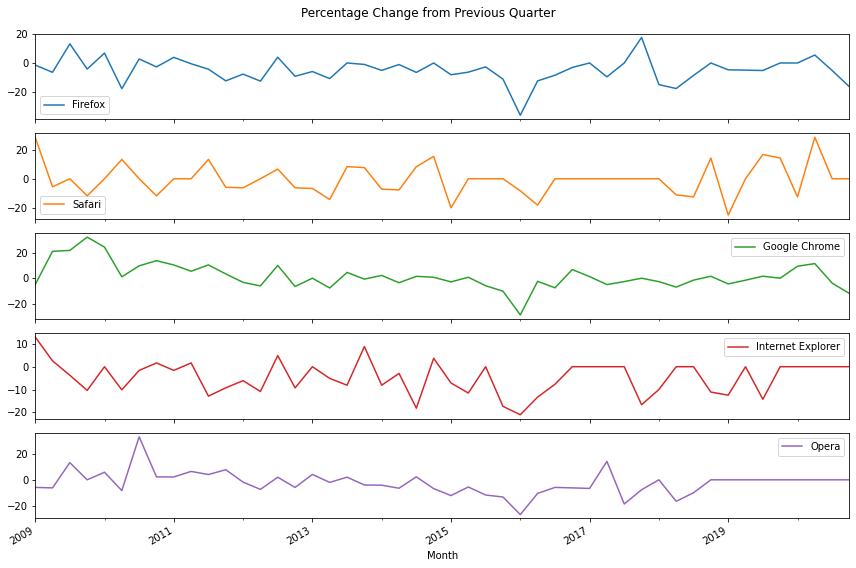

In [8]:
import matplotlib as plt

df_quarterly = df.resample('Q').mean() #using resample quarterlyfor quarter end frequency 
pct_change_quarterly = df_quarterly.pct_change() * 100 #formatting

#only have the data where the year is after or is 2009
pct_change_quarterly = pct_change_quarterly[pct_change_quarterly.index.year >= 2009]

#dataframe displauy
display(pct_change_quarterly.head())

#matplotlib stuff
pct_change_quarterly.plot(subplots=True, figsize=(12, 8), title="Percentage Change from Previous Quarter")


,2009,2012,2015,2018
January,13,52,48,24
February,12,50,45,24
March,13,47,42,24
April,16,47,47,22
May,15,48,46,23
June,15,45,43,22
July,18,51,44,20
August,18,53,43,21
September,20,50,41,25
October,21,48,40,23


AttributeError: module 'matplotlib' has no attribute 'xlabel'

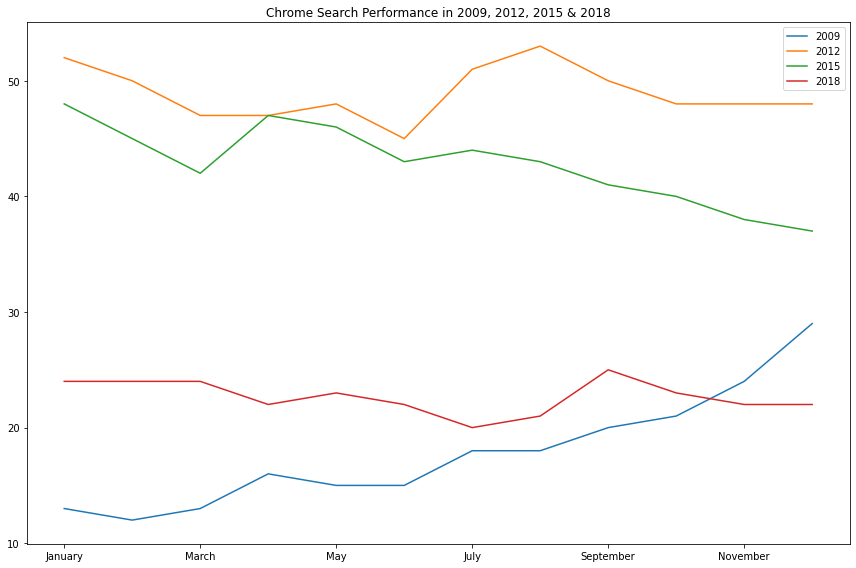

In [10]:
years = [2009, 2012, 2015, 2018] #the list of years we focus on
chrome_trends = pd.DataFrame()  #making a duplicate dataframe (could also use df copy function)

for year in years: #iterator to check for the values in the above years
    chrome_trends[year] = df[df.index.year == year]['Google Chrome'].values 

chrome_trends.index = pd.date_range(start='1/1/2009', periods=12, freq='M').strftime('%B') 

display(chrome_trends) #print df

chrome_trends.plot(title="Chrome Search Performance in 2009, 2012, 2015 & 2018", figsize=(12, 8)) #matplotlib stuff 
plt.xlabel("Month") #labels
plt.ylabel("Search Interest")